In [ ]:
%cd C:/Users/alapa/funiegan/

In [ ]:
import argparse
from torchvision import transforms
import tkinter as tk
from tkinter import filedialog
import torch
from PIL import Image
from torch.autograd import Variable
from IPython.display import display
from torchvision.utils import save_image
from os.path import exists

print("upload image")
# Create a Tkinter window
root = tk.Tk()
# Hide the main window

# Prompt the user to select an image file
file_path = filedialog.askopenfilename(
    filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif;*.bmp")]
)

if not file_path:
    print("No file selected. Exiting.")
    exit()

# Load the selected image
img = Image.open(file_path)
display(img)
root.withdraw()

print("image uploaded")

In [1]:
%cd C:/Users/alapa/funiegan/
import argparse
import os
import torch
from torch.autograd import Variable
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image
import tkinter as tk
from tkinter import filedialog, Tk
import time
import numpy as np
from os.path import join, basename, exists
import glob


C:\Users\alapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\alapa\funiegan


upload image


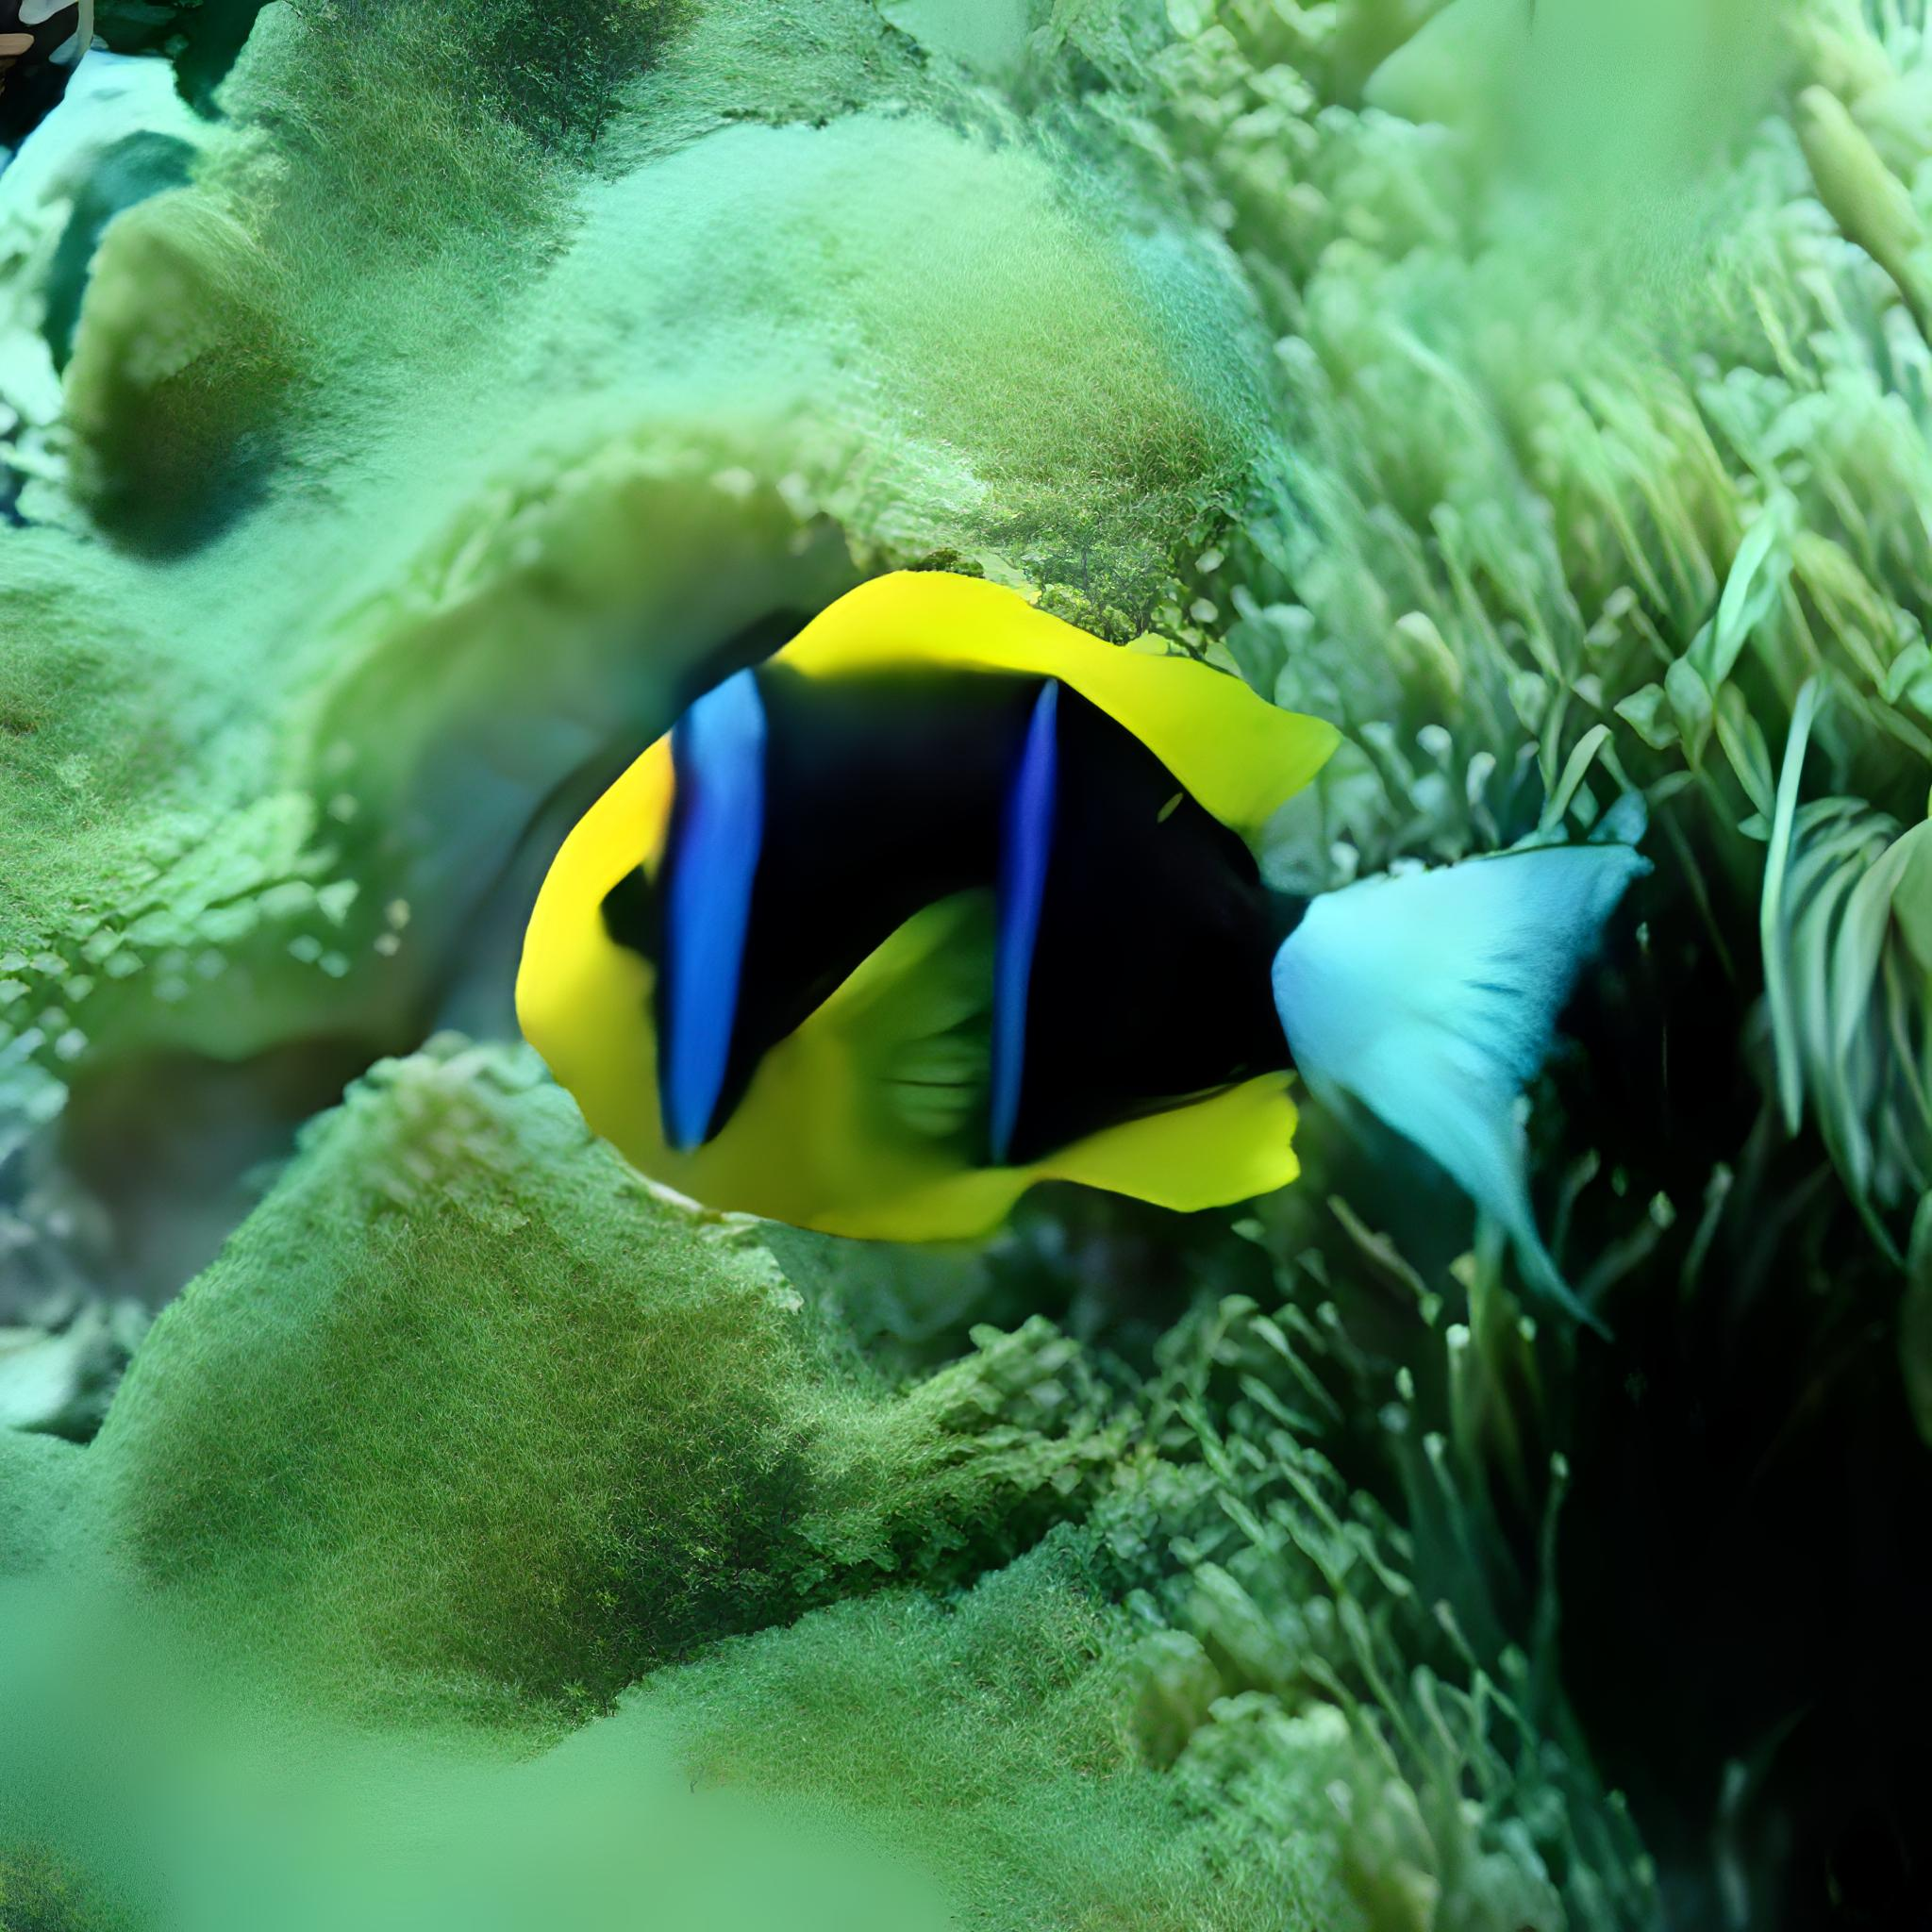

image uploaded
checkpoints/FunieGAN(A1)/EUVP/generator_16.pth
checkpoints/FunieGAN(A1)/EUVP/generator_16.pth


C:\Users\alapa\AppData\Local\Temp\ipykernel_8080\1580208117.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(opt.model_path))


Loaded model from checkpoints/FunieGAN(A1)/EUVP/generator_16.pth
Tested: C:/Users/alapa/image upscaler/results/RealESRGAN_x8.pth/output_test_p32_.jpg
Processing time: 1.215 seconds
Saved generated image at EUVP/test_samples/result/batch1test1/A1\output_output_test_p32_.jpg


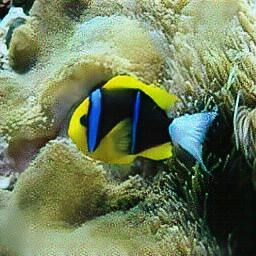

In [3]:
### new code for i image testing
substring = "A2"
print("upload image")
# Create a Tkinter window
root = tk.Tk()
# Hide the main window

# Prompt the user to select an image file
file_path = filedialog.askopenfilename(
    filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif;*.bmp")]
)

if not file_path:
    print("No file selected. Exiting.")
    exit()

# Load the selected image
img = Image.open(file_path)
display(img)
root.withdraw()

print("image uploaded")
# Initialize model settings
i = 16
generator = f"checkpoints/FunieGAN(A1)/EUVP/generator_{i}.pth"
print(generator)
parser = argparse.ArgumentParser()
parser.add_argument("--data_dir", type=str, default=r"EUVP/test_samples/Inp")
parser.add_argument("--sample_dir1", type=str, default=r"EUVP/test_samples/result/batch1test1/A1")
parser.add_argument("--sample_dir2", type=str, default=r"EUVP/test_samples/result/batch1test1/A2")
parser.add_argument("--model_name", type=str, default="funiegan")  # or "ugan"
parser.add_argument("--model_path", type=str, default=generator)
opt, unknown = parser.parse_known_args()

print(opt.model_path)

assert exists(opt.model_path), "Model not found"
os.makedirs(opt.sample_dir1, exist_ok=True)
os.makedirs(opt.sample_dir2, exist_ok=True)
is_cuda = torch.cuda.is_available()
Tensor = torch.cuda.FloatTensor if is_cuda else torch.FloatTensor

if opt.model_name.lower() == 'funiegan':
    from PyTorch.nets import A2funiegan
    model = A2funiegan.GeneratorFunieGAN()
elif opt.model_name.lower() == 'ugan':
    from nets.ugan import UGAN_Nets
    model = UGAN_Nets(base_model='pix2pix').netG
else:
    pass

model.load_state_dict(torch.load(opt.model_path))
if is_cuda:
    model.cuda()
model.eval()
print("Loaded model from %s" % (opt.model_path))

# Data pipeline
img_width, img_height, channels = 256, 256, 3
transforms_ = [
    transforms.Resize((img_height, img_width), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
]
transform = transforms.Compose(transforms_)

# Load the selected image
inp_img = transform(img)
inp_img = Variable(inp_img).type(Tensor).unsqueeze(0)

# Generate enhanced image
s = time.time()
gen_img = model(inp_img)
processing_time = time.time() - s

if substring in generator:
    sample_dir = opt.sample_dir2
else:
    sample_dir = opt.sample_dir1

# Save output
#img_sample = torch.cat((inp_img.data, gen_img.data), -1)
img_sample = gen_img.data
output_path = join(sample_dir, f"output_{basename(file_path)}")
save_image(img_sample, output_path, normalize=True)
print("Tested:", file_path)
print(f"Processing time: {processing_time:.3f} seconds")
print(f"Saved generated image at {output_path}")
gen_img = Image.open(output_path)
display(gen_img)

